In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
data = pd.read_csv(url)

In [17]:
data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,35928,35981,36036,36157,36263,36368,36471,36542,36675,36710
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,4466,4570,4637,4763,4880,4997,5105,5197,5276,5396
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,25484,26159,26764,27357,27973,28615,29229,29831,30394,30950
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,889,897,897,897,907,907,918,922,925,925
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,851,880,916,932,950,1000,1078,1109,1148,1164


In [18]:
#drop Province/State
data.drop(labels=['Province/State'], inplace= True, axis=1)

In [19]:
data.head()

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20
0,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,...,35928,35981,36036,36157,36263,36368,36471,36542,36675,36710
1,Albania,41.15330,20.168300,0,0,0,0,0,0,0,...,4466,4570,4637,4763,4880,4997,5105,5197,5276,5396
2,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,...,25484,26159,26764,27357,27973,28615,29229,29831,30394,30950
3,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,...,889,897,897,897,907,907,918,922,925,925
4,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,...,851,880,916,932,950,1000,1078,1109,1148,1164


In [20]:
data.shape

(266, 196)

In [21]:
#Checking for NaN values
data.isnull().values.any()

False

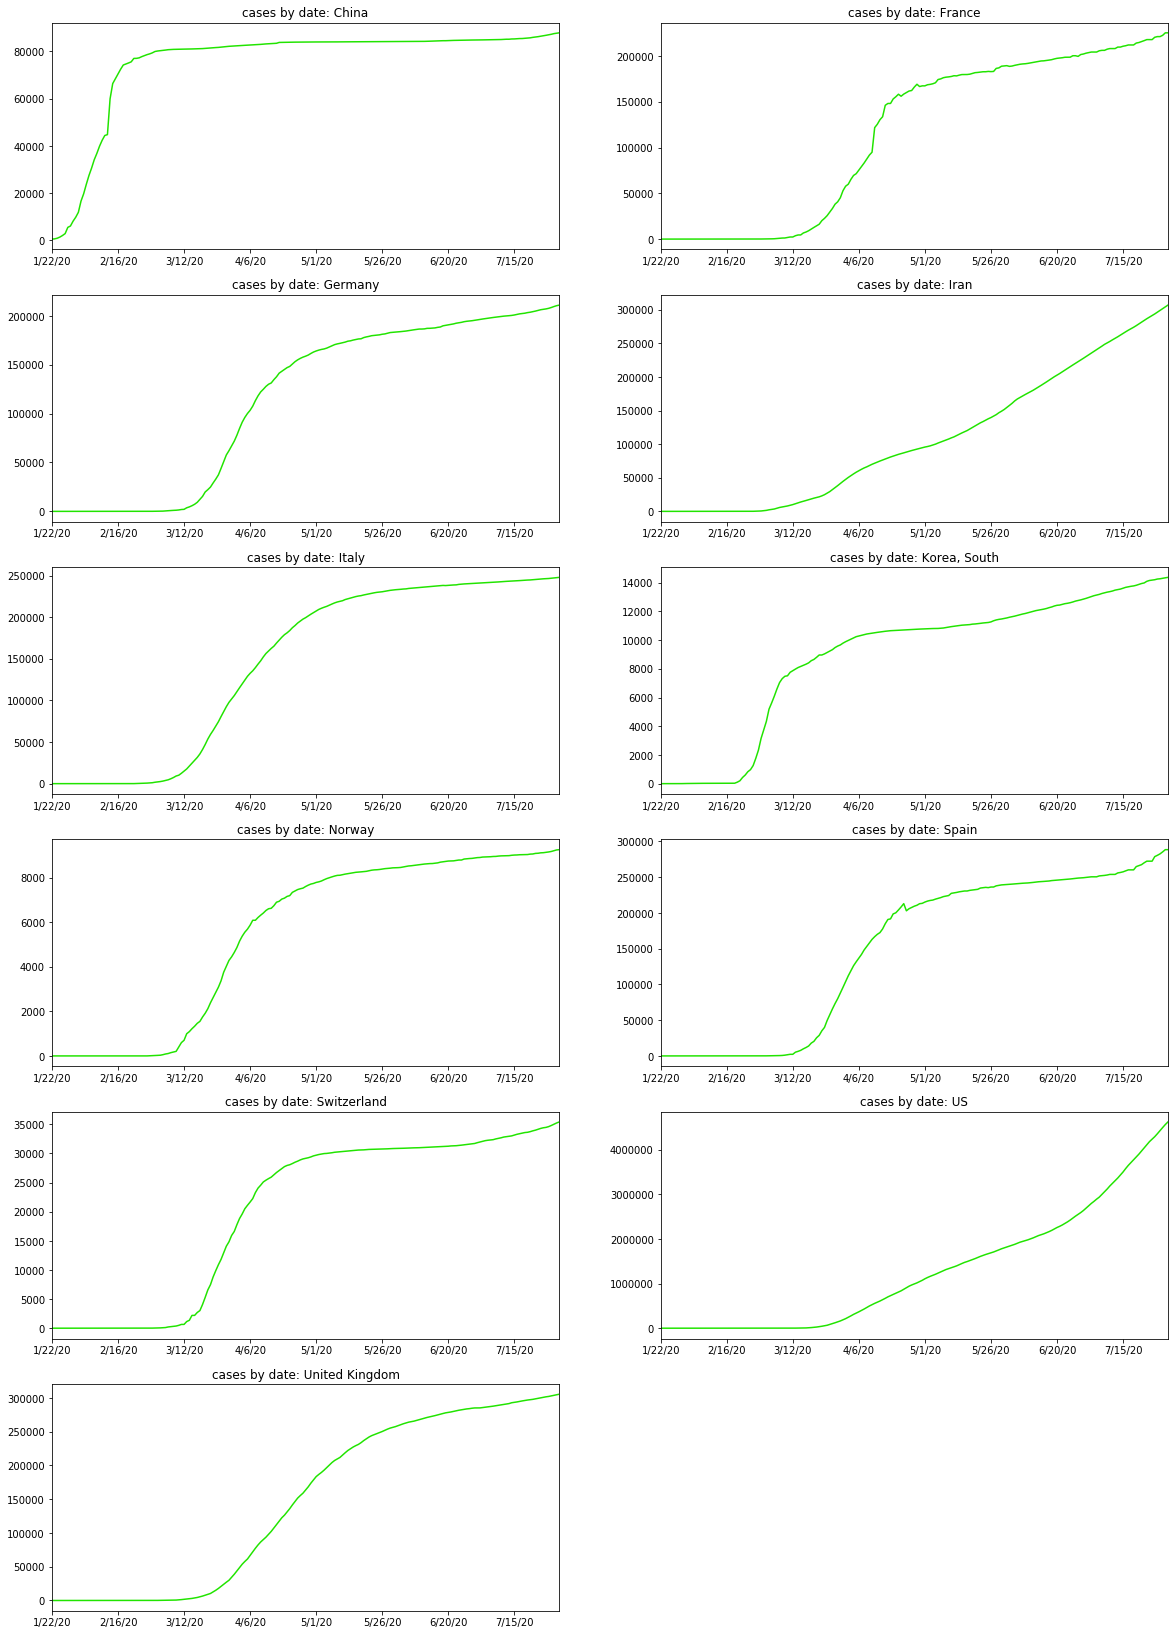

In [28]:
#Countrywise plot
countries = sorted(data['Country/Region'].unique())
rows = len(countries) // 2 + 1
i = 0
for country in (countries):
    country_data = data[data['Country/Region'] == country]
    # sum all the rows together for each column, and select only the data columns
    by_date = country_data.sum(axis=0).filter(like='/20')
    
    # plot it if numbers exceed specified amount on date
    if by_date['3/14/20'] > 1000:
        plt.subplot(rows, 2, i+1)
        by_date.plot(title='cases by date: %s' % country, color='#21e400', figsize=(20,5 * rows))
        i += 1

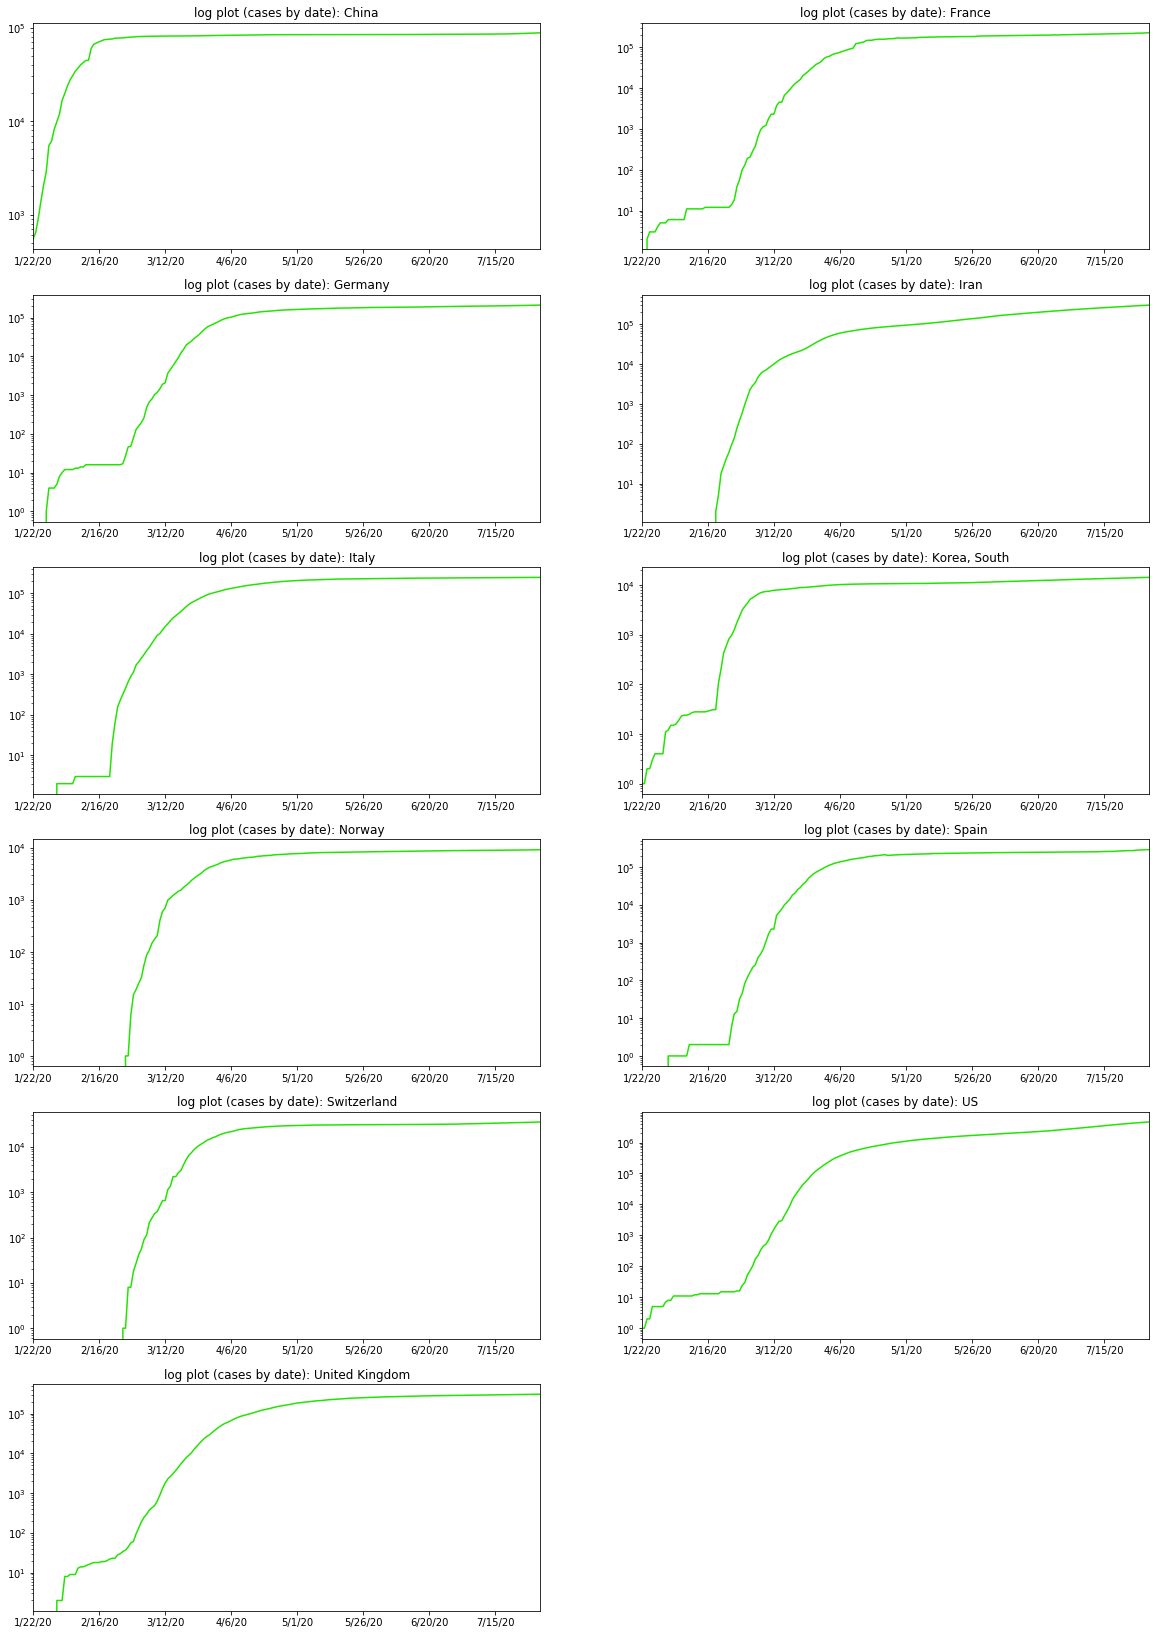

In [29]:
#Countrywise logarithmic plot
countries = sorted(data['Country/Region'].unique())
rows = len(countries) // 2 + 1
i = 0
for country in (countries):
    country_data = data[data['Country/Region'] == country]
    # sum all the rows together for each column, and select only the data columns
    by_date = country_data.sum(axis=0).filter(like='/20')
    
    # plot it if numbers exceed specified amount on date
    if by_date['3/14/20'] > 1000:
        plt.subplot(rows, 2, i+1)
        plt.yscale('log')
        by_date.plot(title='log plot (cases by date): %s' % country, color='#21e400', figsize=(20,5 * rows))
        i += 1